In [1]:
from sklearn.svm import SVC
import numpy as np

In [2]:
np.random.seed(0)
x = np.random.randn(200, 2)
y = np.where(np.logical_xor(x[:, 0] > 0, x[:, 1] > 0), 0, 1)

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
def plot_decision_regions(x, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)

In [5]:
# kernel : 초평면 형태
# C (cost) : 이상치 (낮으면 소프트마진, 높으면 하드마진) - l2 규제
svc = SVC(kernel="linear", random_state=0, C=1)
svc.fit(x, y)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


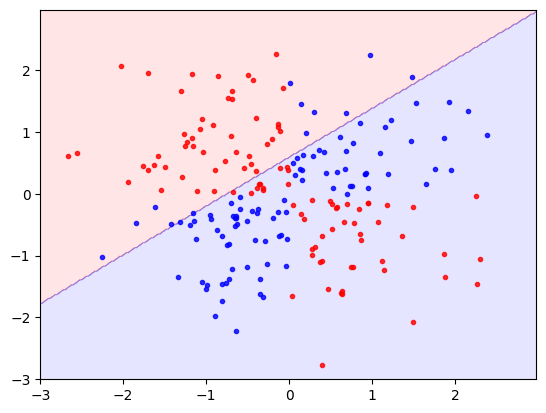

In [6]:
plot_decision_regions(x, y, svc)

In [24]:
# rbf (Radial Basis Function) : 가우시안 rbf 커널
# gamma : 경계의 복잡도 (support vector의 영향력이 미치는 거리 - 표준편차)
# - 값이 클수록 작은 표준편차 (support vector 간 유클리드 거리 = 영향력이 좁아진다) -> overfitting
# - 값이 작을수록 큰 표준편차 -> underfitting

svc = SVC(kernel="rbf", random_state=1, C=1, gamma=10)
model = svc.fit(x, y)

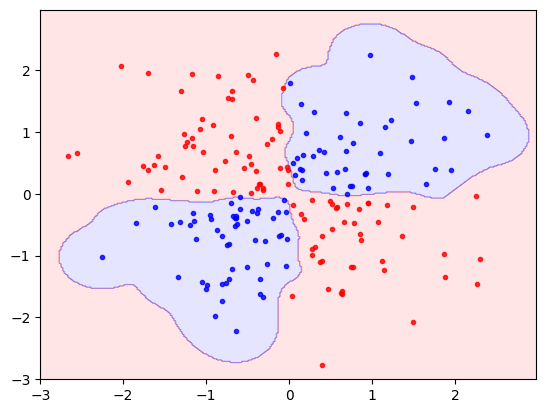

In [25]:
plot_decision_regions(x, y, svc)